<a href="https://colab.research.google.com/github/PJ14ssi/Samsung-AI-2023-Code-A/blob/main/Code_A_Facial_Landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Created on 24 March 2023 
# Author(s): Jan-Marini Pacleb, Danait Aregay, Freda Dorbu, Joan Ejeta, Jasmin Hicks, Jayda Ritchie
# Palsy database obtained with consent via Hsu, G.-S. and Kang, J.-H., "Deep Hierarchical Network with Line Segment Learning for Quantitative Analysis of Facial Palsy", in IEEE Access 7: 4833-4842,2019.



In [ ]:
!pip install opencv-python mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 32.1 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp


In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
from google.colab import files
palsy_uploaded = files.upload()


Saving 221_1.png to 221_1.png


221_1.png


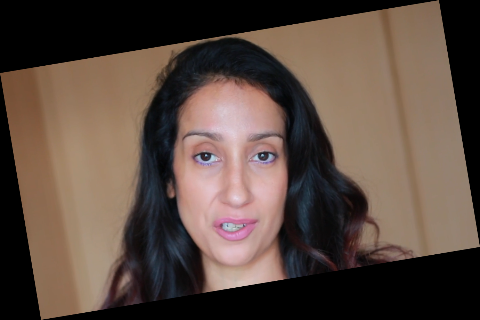

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in palsy_uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)


In [ ]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [ ]:
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:

for el in images.keys():
  image=np.array(images[el])
  face_mesh_results=face_mesh_images.process(image[:,:,::-1])
  LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
  RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

  if face_mesh_results.multi_face_landmarks:
    
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        print(f'LEFT EYE LANDMARKS:\n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:
            
            print(face_landmarks.landmark[LEFT_EYE_INDEX])
            
        print(f'RIGHT EYE LANDMARKS:\n')
        
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:
            
            print(face_landmarks.landmark[RIGHT_EYE_INDEX])



FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:

x: 0.5331516265869141
y: 0.4852657914161682
z: -0.005901120137423277

x: 0.5428867340087891
y: 0.47783946990966797
z: -0.007149918936192989

RIGHT EYE LANDMARKS:

x: 0.4176042973995209
y: 0.47836923599243164
z: -0.010420088656246662

x: 0.4047812223434448
y: 0.49030381441116333
z: 0.0018795155920088291



This is for the normal code

In [ ]:
drawing_spec = mp_drawing.DrawingSpec(thickness=0.25, circle_radius=0.25)
annotated_images=[]
# Detecting only a singular face in an image/video. 
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

  for name, image in images.items():
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    annotated_image = image.copy()
    annotated_images.append(annotated_image)
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      
      # Face Mesh Tesslation
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      
       # Face Mesh Contours
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      
      # Face Mesh Irises
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
      


      cv2.imwrite('/tmp/annotated_image' + '.png', annotated_image)

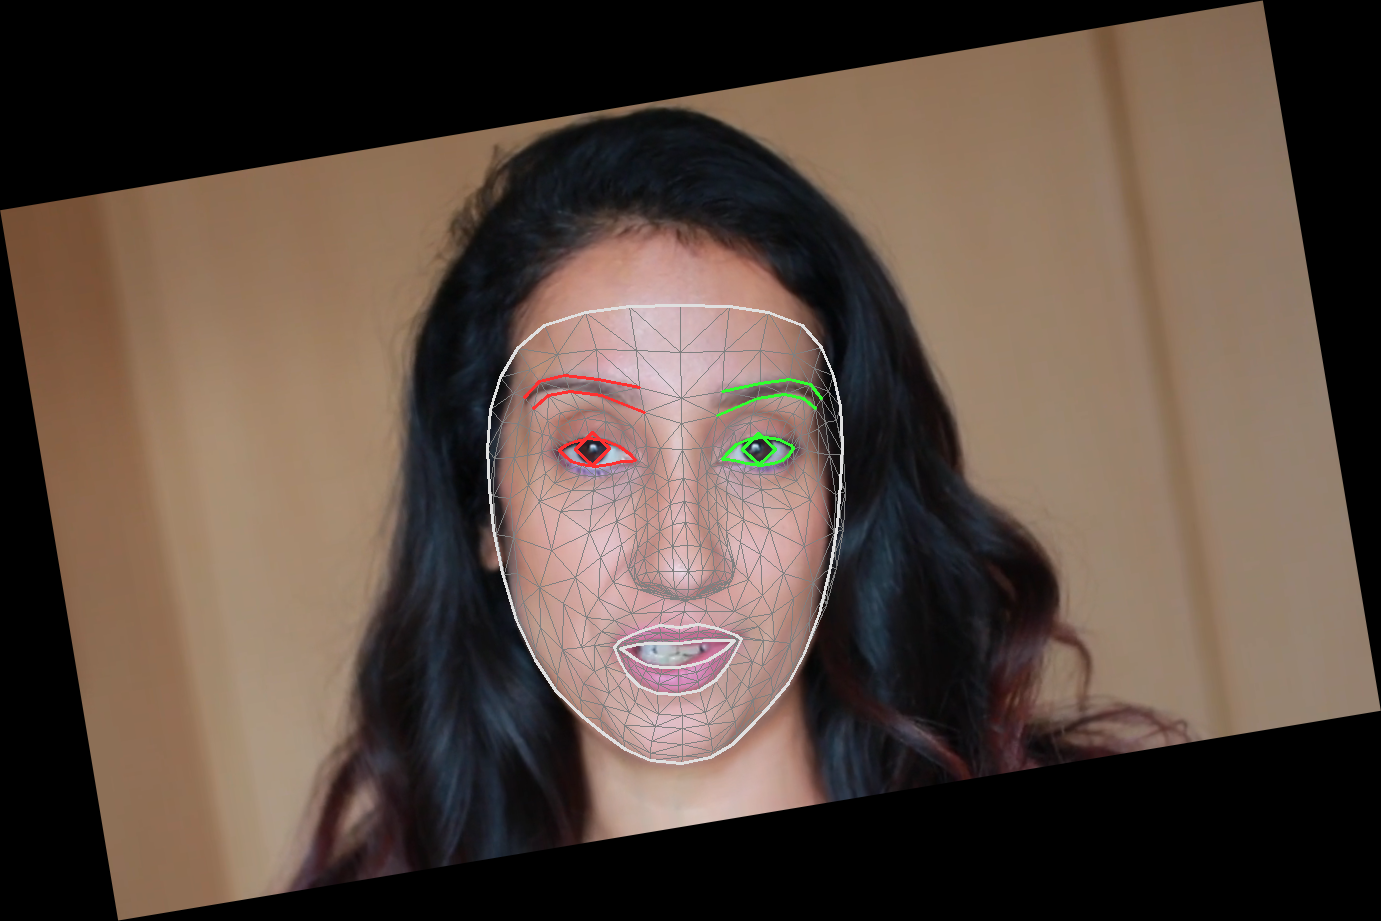

In [ ]:
for annotated_img in annotated_images:
  cv2_imshow(annotated_img)